Average number of sentences total, classwise, sourcewise

Average number of words total, sourcewise, classwise 


Word cloud for each source

Plots of different embeddings using pca/tane/uma in 2D for classes 0 and 1 (sourcewise)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('term_unique_13K_all_in_one_NEW_CLEANED_FINAL.csv')

In [3]:
data

,terms,definitions,source,assigned_readability,flesch_reading_ease,flesch_kincaid_grade,smog_index,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford,gulpease_index,osman
0,adjusted present value (apv),net present value of an asset if financed sole...,prin,0,59.64,9.9,0.0,9.40,10.5,10.16,6,12.000000,12.00,9th and 10th grade,96.4,93.39,43.58,2.9,57.500000,63.21
1,agency costs,"costs that arise when an agent (e.g., a manage...",prin,0,66.07,9.5,0.0,7.78,12.3,10.47,4,15.000000,14.25,9th and 10th grade,100.4,97.05,45.61,2.6,54.454545,66.35
2,annual percentage rate (apr),"the interest rate per period (e.g., per month)...",prin,0,62.68,8.7,0.0,6.67,8.4,10.98,4,12.500000,16.21,8th and 9th grade,99.5,94.55,48.74,2.9,61.352941,75.43
3,annuity,investment that produces a level stream of cas...,prin,0,56.25,9.1,0.0,9.56,8.7,9.64,4,10.500000,14.00,9th and 10th grade,95.6,92.16,44.04,3.1,61.000000,64.66
4,annuity due,annuity whose payments occur at the start of e...,prin,0,61.33,7.2,0.0,8.50,6.2,10.45,4,6.000000,12.00,8th and 9th grade,100.6,97.16,46.11,2.4,71.000000,74.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13107,ZERO COUPON SWAP,An OVER-THE-COUNTER SWAP involvingtheexchange ...,palgrave,0,35.78,12.9,0.0,13.46,13.4,10.10,9,13.250000,12.81,12th and 13th grade,80.0,73.84,37.34,4.5,50.891892,43.46
13108,ZERO COUPON YIELD CURVE,A YIELD CURVE representing DISCOUNTRATES acros...,palgrave,0,52.19,10.7,14.1,15.66,15.5,10.95,17,13.166667,15.32,15th and 16th grade,91.5,87.28,33.41,3.4,46.543860,33.87
13109,ZERO MINUS TICK,Sale of a SECURITY at the same price as the la...,palgrave,0,66.74,7.2,10.5,6.83,6.2,9.14,9,7.166667,9.30,6th and 7th grade,103.6,101.18,48.87,2.3,67.205128,80.33
13110,ZERO PLUS TICK,Sale of a SECURITY at the same price as the la...,palgrave,0,66.74,7.2,10.5,6.54,6.0,8.73,8,7.166667,9.30,6th and 7th grade,103.6,102.78,49.36,2.2,67.717949,81.57


# Average number of sentences total, classwise, sourcewise

In [4]:
import spacy
nlp = spacy.load('en_core_web_sm') # Load the English Model

In [5]:
def num_sents(txt):
  doc = nlp(txt)
  return len([i for i in doc.sents])

In [6]:
data['number_of_sentences'] = data['definitions'].apply(lambda x : num_sents(str(x)))

In [7]:
data['number_of_sentences'].mean()

2.260372178157413

In [8]:
data['number_of_sentences'].max()

73

In [9]:
data['number_of_sentences'].min()

1

In [10]:
data['number_of_sentences'].median()

2.0

In [11]:
data[data['number_of_sentences']==73].iloc[0,:]['definitions']

'Dim sum bond\' is a slang term for bonds denominated in Chinese renminbi and issued in Hong Kong. Dim sum bonds are attractive to foreign investors who desire exposure to renminbi-denominated assets, but are restricted by China\'s capital controls from investing in domestic Chinese debt.\tinvestopedia\t1\t40.18\t13.2\t0\t13.41\t15.3\t11.77\t14\t15.75\t15.22\t15th and 16th grade\t81.9\t76.35\t36.45\t4.2\t48.33333333\t40.39\nDirect Cost\tA direct cost is a price that can be directly tied to the production of specific goods or services. A direct cost can be traced to the cost object, which can be a service, product, or department. Direct and indirect costs are the two major types of expenses or costs that companies can incur. Direct costs are often variable costs, meaning they fluctuate with production levels such as inventory. However, some costs, such as indirect costs are more difficult to assign to a specific product. Examples of indirect costs include depreciation and administrative

In [12]:
data.groupby('source')['number_of_sentences'].mean()

source
6_8_louis             1.508772
9_12_louis            1.260638
economist             3.719912
fmi                   1.178295
investopedia          2.646821
ncert                 1.252174
ncert_class12_econ    1.097561
ncert_keec111         1.010526
ncert_kest            1.245283
opod                  1.146110
palgrave              2.122293
pre_louis             1.166667
prin                  1.192090
sam                   2.561934
zvi                   1.229675
Name: number_of_sentences, dtype: float64

In [14]:
data.groupby('assigned_readability')['number_of_sentences'].mean()

assigned_readability
0    1.852941
1    2.555497
Name: number_of_sentences, dtype: float64

# Average number of tokens total, sourcewise, classwise

In [15]:
def num_tokens(txt):
  doc = nlp(txt)
  return len([i for i in doc])

In [16]:
data['number_of_tokens'] = data['definitions'].apply(lambda x : num_tokens(str(x)))

In [17]:
data['number_of_tokens'].mean()

48.26189749847468

In [18]:
data.groupby('source')['number_of_tokens'].mean()

source
6_8_louis             28.792398
9_12_louis            23.234043
economist             80.455142
fmi                   20.126615
investopedia          64.741171
ncert                 19.747826
ncert_class12_econ    20.634146
ncert_keec111          3.863158
ncert_kest            16.396226
opod                  16.800759
palgrave              37.978344
pre_louis             15.527778
prin                  14.338983
sam                   42.601208
zvi                   19.546748
Name: number_of_tokens, dtype: float64

In [19]:
data.groupby('assigned_readability')['number_of_tokens'].mean()

assigned_readability
0    32.291757
1    59.829958
Name: number_of_tokens, dtype: float64

# Word cloud for each source

In [20]:
!pip install wordcloud

In [21]:
import collections
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [22]:
other_stopwords_to_remove = ['\t']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

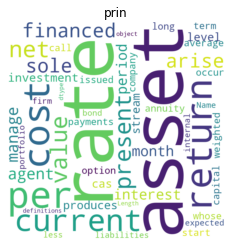

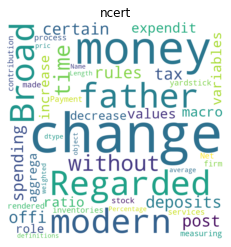

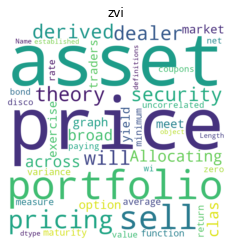

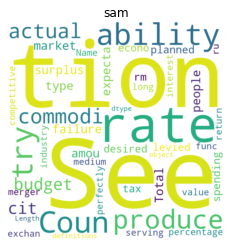

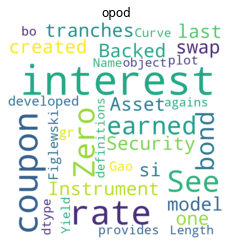

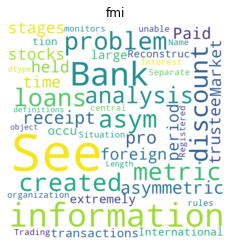

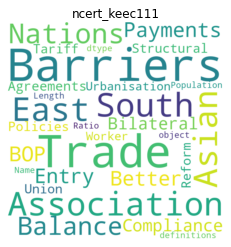

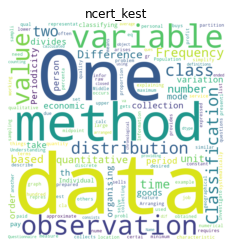

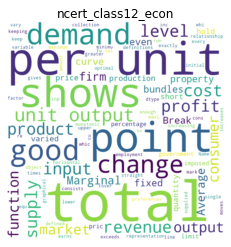

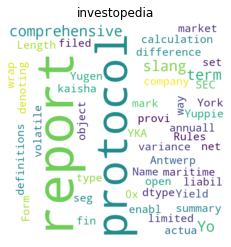

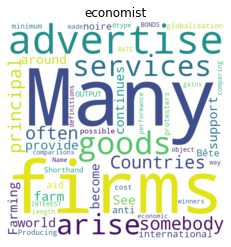

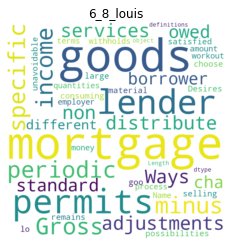

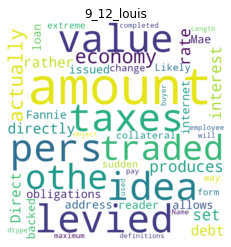

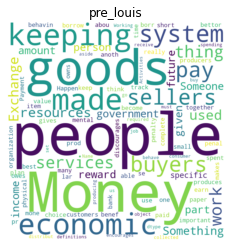

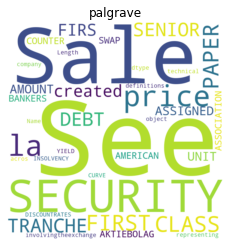

In [23]:
for source in data['source'].unique():
  data_source = data[data['source']==source]
  text = data_source['definitions']
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=2000,
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(source)
  plt.axis("off")
  plt.show()

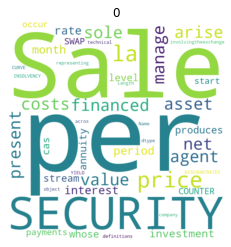

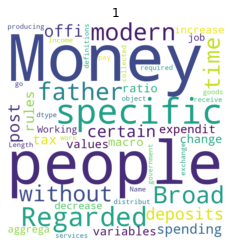

In [24]:
for read in data['assigned_readability'].unique():
  data_read = data[data['assigned_readability']==read]
  text = data_read['definitions']
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=2000,
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(read)
  plt.axis("off")
  plt.show()

# Numeric columns distribution

In [25]:
numeric_columns = [
       'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog',
       'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini', 'crawford',
       'gulpease_index', 'osman']


In [26]:
data[numeric_columns].describe()

,flesch_reading_ease,flesch_kincaid_grade,smog_index,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford,gulpease_index,osman
count,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000,13112.000000
mean,42.304360,12.264628,4.379042,12.057892,13.668830,10.608385,11.532413,13.139519,14.414410,84.238423,80.783611,37.875282,3.365985,58.628053,47.016276
std,23.705007,4.440433,6.596280,4.281754,5.278037,2.148938,7.267114,6.617198,5.107517,17.635387,18.033181,7.483860,1.885718,23.869971,21.617999
min,-301.790000,-3.500000,0.000000,-33.810000,-6.900000,0.100000,0.000000,-0.500000,0.400000,-154.300000,-167.970000,-50.660000,-19.100000,13.000000,-138.770000
25%,30.870000,9.700000,0.000000,9.880000,10.500000,9.380000,6.000000,8.666667,11.600000,75.100000,71.560000,33.930000,2.900000,47.666667,34.750000
50%,43.390000,12.300000,0.000000,12.020000,13.500000,10.460000,11.000000,13.250000,14.330000,84.800000,81.310000,38.230000,3.600000,52.636364,46.960000
75%,55.920000,14.600000,12.000000,14.340000,16.500000,11.640000,16.000000,16.750000,17.130000,94.400000,90.942500,42.220000,4.300000,59.357143,58.862500
max,121.220000,55.600000,26.500000,51.360000,65.000000,35.270000,131.000000,73.000000,56.000000,145.800000,143.540000,75.450000,14.100000,359.000000,175.600000


In [27]:
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

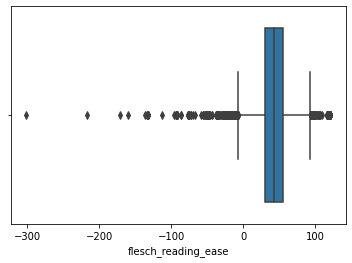

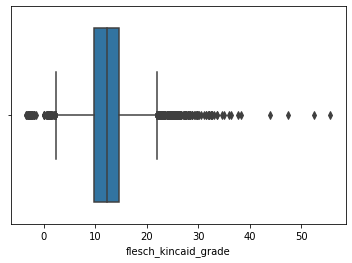

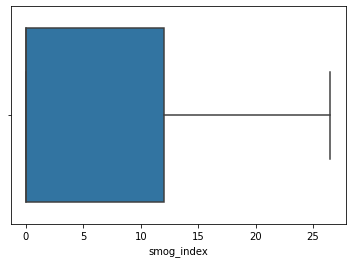

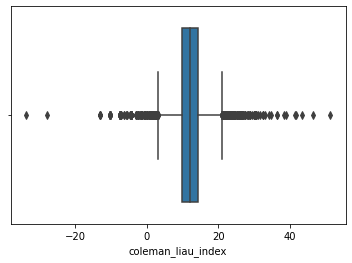

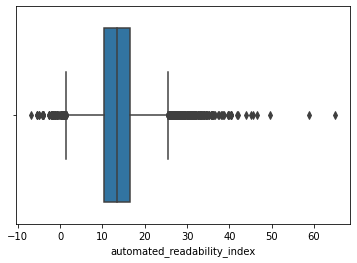

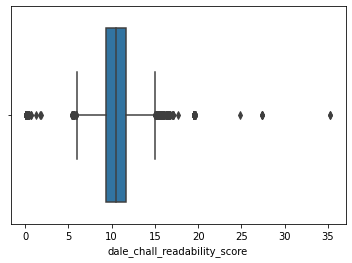

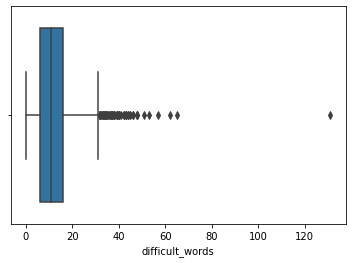

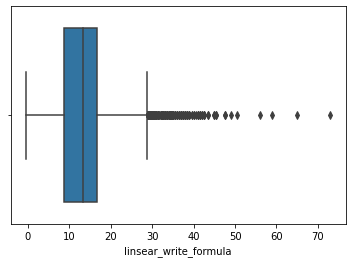

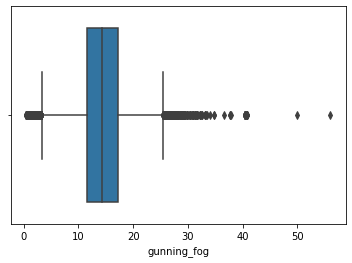

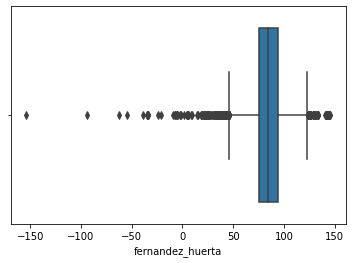

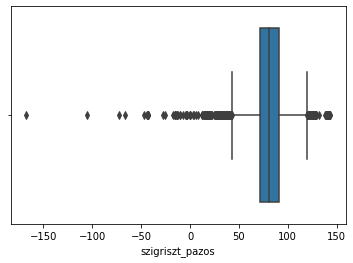

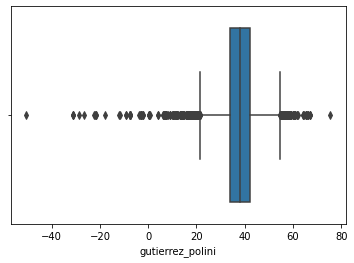

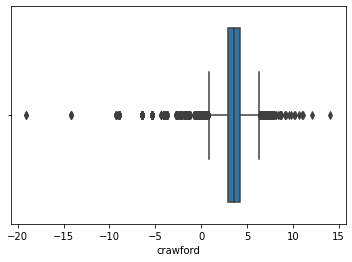

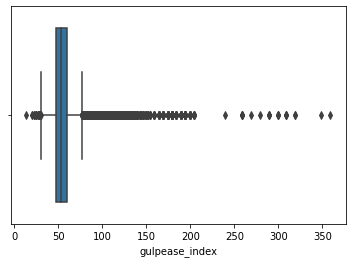

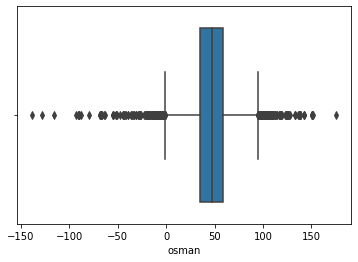

In [28]:
for col in numeric_columns:
  sns.boxplot(data=data, x = col)
  plt.show()
